In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/generated-data/fake_data.csv
/kaggle/input/machine-failure-prediction/ai4i2020.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = '/content/drive/My Drive/apsfailure.csv'
df = pd.read_csv(data)

In [ ]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [ ]:
df.shape


(60000, 171)

In [ ]:
df.replace("na", np.nan, inplace=True)

In [ ]:
null_counts = df.isnull().sum()
print("Null values in each column:\n", null_counts)

Null values in each column:
 class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64


In [ ]:
# Calculate the sum of null values for each column
null_counts = df.isnull().sum()

# Sort the null counts in descending order
sorted_null_counts = null_counts.sort_values(ascending=False)

# Display the sum of null values for each column in descending order
print("Sum of null values in each column (descending order):")
for col, count in sorted_null_counts.items():
    print(f"{col}: {count} null values")

Sum of null values in each column (descending order):
br_000: 49264 null values
bq_000: 48722 null values
bp_000: 47740 null values
bo_000: 46333 null values
ab_000: 46329 null values
cr_000: 46329 null values
bn_000: 44009 null values
bm_000: 39549 null values
bl_000: 27277 null values
bk_000: 23034 null values
ch_000: 14861 null values
co_000: 14861 null values
cg_000: 14861 null values
cf_000: 14861 null values
ad_000: 14861 null values
ct_000: 13808 null values
cu_000: 13808 null values
cv_000: 13808 null values
cx_000: 13808 null values
cy_000: 13808 null values
cz_000: 13808 null values
da_000: 13808 null values
db_000: 13808 null values
dc_000: 13808 null values
ec_00: 10239 null values
cm_000: 9877 null values
ed_000: 9553 null values
cl_000: 9553 null values
ak_000: 4400 null values
ca_000: 4356 null values
dm_000: 4009 null values
dh_000: 4008 null values
dg_000: 4008 null values
df_000: 4008 null values
dl_000: 4008 null values
eb_000: 4007 null values
dk_000: 4007 null valu

In [ ]:
# Calculate null percentages
null_percentages = df.isna().sum() / len(df) * 100

# Sort and print in descending order
null_percentages = null_percentages.sort_values(ascending=False)
print(null_percentages)

br_000    82.106667
bq_000    81.203333
bp_000    79.566667
bo_000    77.221667
ab_000    77.215000
            ...    
cj_000     0.563333
ci_000     0.563333
bt_000     0.278333
aa_000     0.000000
class      0.000000
Length: 171, dtype: float64


In [ ]:
# List of columns to drop
columns_to_drop = ['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000', 'bm_000']

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
total_nulls = df.isnull().sum().sum()
print("Total number of null values in the DataFrame:", total_nulls)

Total number of null values in the DataFrame: 481740


In [ ]:
df['class'] = df['class'].replace({'neg': 0, 'pos': 1})

<ipython-input-16-17f928403c43>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'neg': 0, 'pos': 1})


In [ ]:
df.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [ ]:
df = df.astype(float)

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
total_nulls = df.isnull().sum().sum()
print("Total number of null values in the DataFrame:", total_nulls)

Total number of null values in the DataFrame: 0


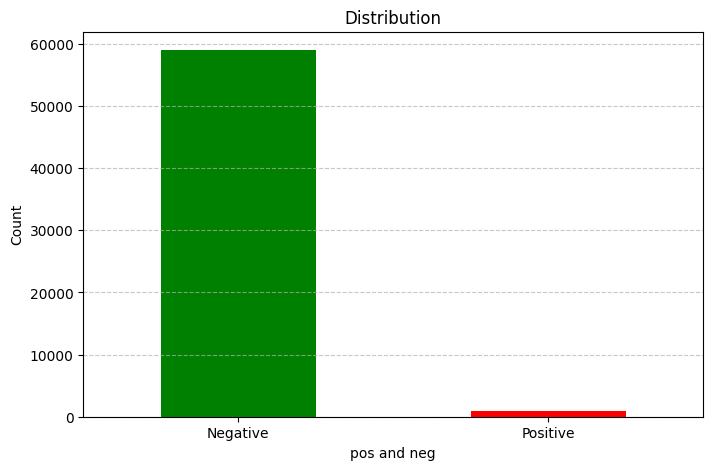

In [ ]:
import matplotlib.pyplot as plt

pass_fail_counts = df['class'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 5))
pass_fail_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution')
plt.xlabel('pos and neg')
plt.ylabel('Count')
plt.xticks(ticks=range(len(pass_fail_counts)), labels=['Negative', 'Positive'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from tensorflow.keras import layers, models

In [ ]:
X = df.drop(columns=['class'])
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for SVM and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
X = df.drop(columns=['class'])  # Features
y = df['class']                  # Target variable

y = y.astype(int)

# Step 1: Initial split to create a temporary test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Identify instances of class 1 in the entire dataset
class_1_indices = y[y == 1].index
class_1_count = len(class_1_indices)

# Step 3: Select all class 1 instances for the test set
X_test = X.loc[class_1_indices]
y_test = y.loc[class_1_indices]

# Step 4: Add instances of class 0 to the test set
# Calculate how many additional class 0 instances are needed
required_class_0 = len(X_temp) - class_1_count

# Filter class 0 instances from the temporary test set
class_0_indices = y_temp[y_temp == 0].index
X_class_0 = X_temp.loc[class_0_indices]

# Select the required number of class 0 instances
X_class_0_test = X_class_0.sample(n=required_class_0, random_state=42)

# Combine class 1 and selected class 0 instances for the test set
X_test = pd.concat([X_test, X_class_0_test])
y_test = pd.concat([y_test, y_temp.loc[X_class_0_test.index]])

# Step 5: Form the final training set
remaining_class_0_indices = y_temp[y_temp == 0].index.difference(X_class_0_test.index)
X_train = pd.concat([X_train, X_class_0.loc[remaining_class_0_indices]])
y_train = pd.concat([y_train, y_temp.loc[remaining_class_0_indices]])

# Print the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: Print the scaled shapes
print(f"Scaled Training data shape: {X_train_scaled.shape}")
print(f"Scaled Testing data shape: {X_test_scaled.shape}")


Training data shape: (48788, 162), Training labels shape: (48788,)
Testing data shape: (12000, 162), Testing labels shape: (12000,)
Scaled Training data shape: (48788, 162)
Scaled Testing data shape: (12000, 162)


In [ ]:
# Check the count of labels in y_train
label_counts = y_test.value_counts()
print("Label counts in y_train:\n", label_counts)

Label counts in y_train:
 class
0    11000
1     1000
Name: count, dtype: int64


In [ ]:
y_train.shape

(48788,)

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE


# Import train_test_split to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Combine X_train_resampled and y_train_resampled into a single DataFrame
resampled_data = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), pd.DataFrame(y_train_resampled, columns=['class'])], axis=1)

# Check the class distribution before and after SMOTE
print("Class Distribution Before SMOTE:")
print(y_train.value_counts().to_frame())

print("\nClass Distribution After SMOTE:")
print(resampled_data['class'].value_counts().to_frame())

Class Distribution Before SMOTE:
       count
class       
0      47212
1        788

Class Distribution After SMOTE:
       count
class       
0      47212
1      47212


In [ ]:
resampled_data.shape

(94424, 163)

# CNN

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming your dataset has 'class' as the target (label) and the rest are features

# Specify the features (based on your column names)
features = [
    'aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000',
    'ag_001', 'ag_002', 'ag_003', 'ee_002', 'ee_003', 'ee_004',
    'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009', 'ef_000',
    'eg_000'
]

# Specify the label (target column)
label = ['class']


X = resampled_data[features].values
y = resampled_data[label].values

# Step 2: Preprocess the data (scaling, normalization, etc.)
# You can perform scaling, normalization, or any other preprocessing based on your data characteristics and requirements.

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into train and test sets

# Get the number of records in the train and test datasets
num_train_records = X_train.shape[0]
num_test_records = X_test.shape[0]

print(f"Number of records in the train dataset: {num_train_records}")
print(f"Number of records in the test dataset: {num_test_records}")
# Step 4: Create the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 5: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model on the trainingA data
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=15, batch_size=32)

# Step 7: Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print("Test accuracy:", accuracy)

# Step 8: Make predictions using the trained model
y_pred = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = np.round(y_pred)

# Remove the extra dimension from y_test
y_test = y_test.ravel()

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Number of records in the train dataset: 75539
Number of records in the test dataset: 18885


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7155 - loss: 423360.5938
Epoch 2/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8164 - loss: 69291.0391
Epoch 3/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8564 - loss: 17895.4902
Epoch 4/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8734 - loss: 5062.0225
Epoch 5/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9110 - loss: 1067.8552
Epoch 6/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8958 - loss: 171.0326
Epoch 7/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8839 - loss: 7.4209
Epoch 8/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8798 - loss: 0.7407
Epoch 9/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8892 - loss: 0.8129
Epoch 10/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8907 - loss: 0.3120
Epoch 11/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8866 - loss: 0.3443
Ep

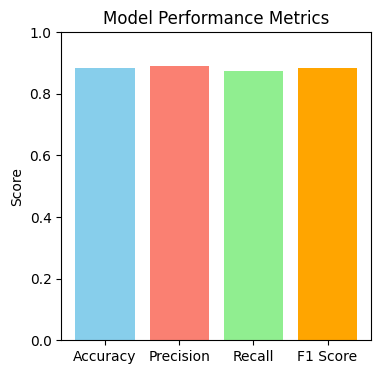

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy, precision, recall, and F1 score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(4, 4))
plt.bar(metrics, values, color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()



Epoch 1/15
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8827 - loss: 7.0373 - val_accuracy: 0.8873 - val_loss: 0.3404
Epoch 2/15
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8853 - loss: 0.5609 - val_accuracy: 0.8897 - val_loss: 0.2847
Epoch 3/15
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8860 - loss: 1.5094 - val_accuracy: 0.8929 - val_loss: 0.2708
Epoch 4/15
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8891 - loss: 1.9784 - val_accuracy: 0.8777 - val_loss: 0.4586
Epoch 5/15
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8716 - loss: 98.2817 - val_accuracy: 0.8938 - val_loss: 0.2677
Epoch 6/15
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8911 - loss: 0.2915 - val_accuracy: 0.8959 - val_loss: 0.2643
Epoch 7/15
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8817 - loss: 29.4800 - val_accuracy: 0.8990 - val_loss: 0.2631
Epoch 8/15
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8995 - loss: 0.2

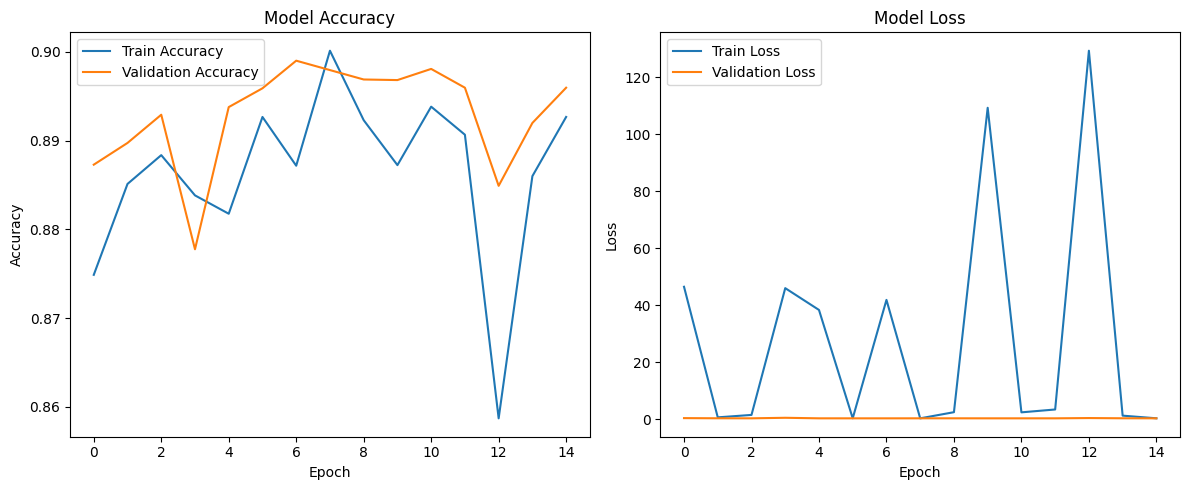

In [ ]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


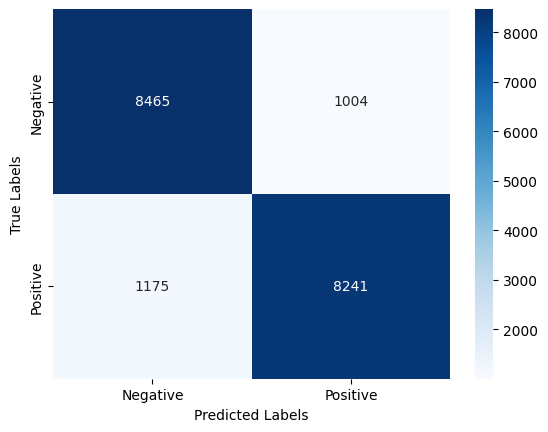

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already made predictions and converted them to binary using y_pred_binary

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

#conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# LSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Specify the features (based on your column names)
features = [
    'aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000',
    'ag_001', 'ag_002', 'ag_003', 'ee_002', 'ee_003', 'ee_004',
    'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009', 'ef_000',
    'eg_000'
]

# Specify the label (target column)
label = ['class']

X = resampled_data[features].values
y = resampled_data[label].values
# Step 2: Preprocess the data (scaling, normalization, etc.)
# You can perform scaling, normalization, or any other preprocessing based on your data characteristics and requirements.

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM
n_timesteps = 1  # Since there is no time step dimension, set it to 1
n_features = X_train.shape[1]

X_train = X_train.reshape((X_train.shape[0], n_timesteps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_timesteps, n_features))

# Step 4: Create the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Step 5: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model on the training data
model.fit(X_train, y_train, epochs=15, batch_size=32)

# Step 7: Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

# Step 8: Make predictions using the trained model
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = np.round(y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6468 - loss: 594049.3750
Epoch 2/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6360 - loss: 435.7296
Epoch 3/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6389 - loss: 1.8532
Epoch 4/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6093 - loss: 0.8000
Epoch 5/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5944 - loss: 8.2140
Epoch 6/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5497 - loss: 0.6957
Epoch 7/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.5546 - loss: 2.2020
Epoch 8/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.5556 - loss: 0.6905
Epoch 9/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.5593 - loss: 0.7070
Epoch 10/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.5570 - loss: 0.7285
Epoch 11/15
2361/2361 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5587 - loss: 0.6748
Epoch 12/15
23

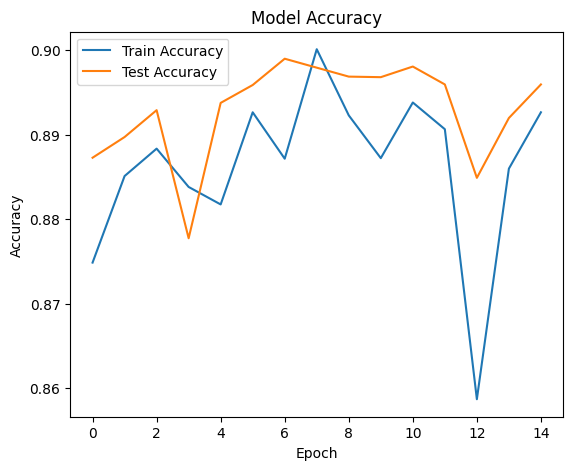

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

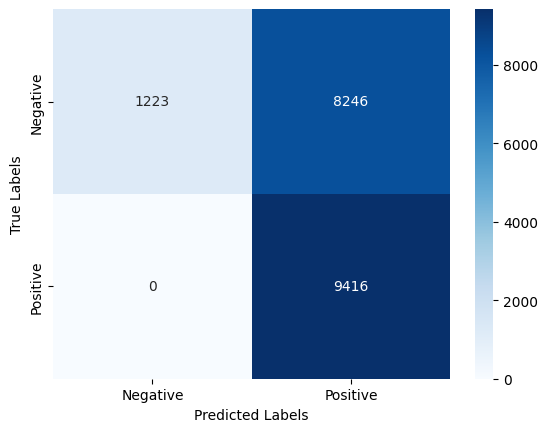

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already made predictions and converted them to binary using y_pred_binary

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

#conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#**SVM**

#**DTC**

In [ ]:
# Initialize and fit the DTC model
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_dtc = dtc_model.predict(X_test_scaled)

# Print classification report
print("DTC Classification Report:\n", classification_report(y_test, y_pred_dtc))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_dtc)
print(f"DTC Model Accuracy: {(accuracy*100):.2f}%")

#**KNN**

In [ ]:
# Initialize and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Print classification report
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {(accuracy*100):.2f}%")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already made predictions and converted them to binary using y_pred_binary

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

#conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# CNN On Generated Data

In [ ]:
fake_data = pd.read_csv('/kaggle/input/generated-data/fake_data.csv')
fake_data.head()

In [ ]:
fake_data.shape

In [ ]:
pip install tensorflow


In [ ]:
features = ['UDI','Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF','OSF','PWF']

label = ['Machine Failure']
X = fake_data[features]
y = fake_data[label]


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

features = ['UDI','Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF','OSF','PWF']

label = ['Machine Failure']
X = fake_data[features]
y = fake_data[label]

# Import train_test_split to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Combine X_train_resampled and y_train_resampled into a single DataFrame
resampled_data1 = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), pd.DataFrame(y_train_resampled, columns=['Machine Failure'])], axis=1)

# Check the class distribution before and after SMOTE
print("Class Distribution Before SMOTE:")
print(y_train.value_counts().to_frame())

print("\nClass Distribution After SMOTE:")
print(resampled_data1['Machine Failure'].value_counts().to_frame())

In [ ]:
resampled_data1.shape

# CNN

In [ ]:

# Step 8: Make predictions using the trained model
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = np.round(y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already made predictions and converted them to binary using y_pred_binary

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

#conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# LSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming your dataset has a 'Machine failure' column as the target (label) and the rest are features
features = ['UDI', 'Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF', 'OSF', 'PWF']
label = ['Machine Failure']

X = resampled_data1[features].values
y = resampled_data1[label].values
# Step 2: Preprocess the data (scaling, normalization, etc.)
# You can perform scaling, normalization, or any other preprocessing based on your data characteristics and requirements.

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM
n_timesteps = 1  # Since there is no time step dimension, set it to 1
n_features = X_train.shape[1]

X_train = X_train.reshape((X_train.shape[0], n_timesteps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_timesteps, n_features))

# Step 4: Create the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Step 5: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 7: Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

# Step 8: Make predictions using the trained model
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = np.round(y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already made predictions and converted them to binary using y_pred_binary

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

#conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()